In [ ]:
#
# Modern modeling ~ iris_modeler:  All-in-one iris clasification via nearest neighbors
#

## Here's our _one-cell_ version of the ML workflow <font color="Coral"><b>let's start here</b></font> &nbsp;&nbsp; <font size="-2">"amoeba version," maybe</font>

This is for iris classification.

You'll need to upload the ``iris_cleaned.csv`` file to this notebook's folder icon, at left.

### Iris classification via Nearest Neighbors

+ Section 1: Libraries
+ Section 2: Read the already-cleaned data  (+ view, if you wish)
+ Section 3:  Drop any columns we don't want to use
+ Section 4:  create COLUMNS and SPECIES variables to show we're organized + know what's happening...
+ Section 5:  convert from pandas (spreadsheet) to numpy (array)
+ Section 6:  define our features (X_all) and our target-to-predict (y_all)
+ Section 7:  80/20 split into training and testing sets:  X_train and y_train, X_test and y_test
+ Section 8:  Here's where the model-building happens!  First, we guess at the parameters (k=84)
+ Section 9:  Let's see how our model does on the TEST data...
+ Section 10:  Let's cross-validate to find the "best" value of k, best_k

In [ ]:
# Section 1:  Libraries
#
import sklearn          # if not present, use a variant of  !pip3 install -U scikit-learn
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

# Section 2:  Read the already-cleaned data  (+ view, if you wish)
#
cleaned_filename = "iris_cleaned.csv"     # data should be "tidy" already...
df_tidy = pd.read_csv(cleaned_filename)   # can add encoding="utf-8" if needed
if False:
    print(f"{cleaned_filename} : file read into a pandas dataframe.")
    print("df_tidy is\n", df_tidy)
    print("df_tidy.info() is"); df_tidy.info()

# Section 3:  Drop any columns we don't want to use
ROW = 0
COLUMN = 1
df_model1 = df_tidy.drop('irisname', axis=COLUMN )
if False:  print("df_model1 is\n", df_model1)

# Section 4:  create COLUMNS and SPECIES variables to show we're organized + know what's happening...
COLUMNS = df_model1.columns                     # int to str
SPECIES = ['setosa','versicolor','virginica']   # int to str
SPECIES_INDEX = { s:i for i,s in enumerate(SPECIES) }  # str to int   {'setosa':0,'versicolor':1,'virginica':2}
COLUMNS_INDEX = { c:i for i,c in enumerate(COLUMNS) }  # str to int   {'sepallen':0,'sepalwid':1,'petallen':2, <more> }
if False:  print(f"{COLUMNS = } \n {COLUMNS_INDEX = } \n {SPECIES = } \n {SPECIES_INDEX = }")

# Section 5:  convert from pandas (spreadsheet) to numpy (array)
A = df_model1.to_numpy()    # yields the underlying numpy array
A = A.astype('float64')     # make sure everything is floating-point
NUM_ROWS, NUM_COLS = A.shape   # let's have NUM_ROWS and NUM_COLS around
if False:  print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")

# Section 6:  define our features (X_all) and our target-to-predict (y_all)
X_all = A[:,0:4]  # X (features) WATCH OUT! This is likely to change from model to model...
y_all = A[:,4]    # y (labels) WATCH OUT! This is likely to change from model to model...
if False:
    print(f"The labels/species are \n {y_all} \n ");
    print(f"The first few data rows are \n {X_all[0:5,:]}")

# Section 7:  80/20 split into training and testing sets:  X_train and y_train, X_test and y_test
from sklearn.model_selection import train_test_split      # this function splits into training + testing sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.20)  # random_state=42 # 20% testing
if False:
    print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )
    print(f"Held-out testing data... (testing data: {len(y_test)} rows)")
    print(f"y_test: {y_test}")
    print(f"X_test (first few rows): {X_test[0:5,:]}\n")
    print(f"Training Data used for modeling... (training data: {len(y_train)} rows)")
    print(f"y_train: {y_train}")
    print(f"X_train (first few rows): {X_train[0:5,:]}")  # 5 rows

# Section 8:  Here's where the model-building happens!  First, we guess at the parameters (k=84)
from sklearn.neighbors import KNeighborsClassifier
k = 84   # we don't know what k to use, so we guess!  (this will _not_ be a good value)
knn_model = KNeighborsClassifier(n_neighbors=k)       # here, k is the "k" in kNN
knn_model.fit(X_train, y_train)      # we train the model ... it's one line!
if False:  print("Created and trained a knn classifier with k =", k)

# Section 9:  Let's see how our naive model does on the TEST data!
predicted_labels = knn_model.predict(X_test)      # THIS IS THE KEY LINE:  predict
actual_labels = y_test
if True:
    print("Predicted labels:", predicted_labels)
    print("Actual  labels  :", actual_labels)
    num_correct = sum(predicted_labels == actual_labels)
    total = len(actual_labels)
    print(f"\nResults on test set:  {num_correct} correct out of {total} total, for {num_correct*100/total}%\n")

# Section 10:  Let's cross-validate to find the "best" value of k, best_k:
import time
from sklearn.model_selection import cross_val_score
all_accuracies = []
best_k = 84  # Not correct!
best_accuracy = 0.0  # also not correct...
for k in range(1,85):    # Note that we are cross-validating using only our TRAINING data!
    knn_cv_model = KNeighborsClassifier(n_neighbors=k)   # build a knn_model for every k
    cv_scores = cross_val_score( knn_cv_model, X_train, y_train, cv=5 )  # cv=5 means 80/20
    this_cv_accuracy = cv_scores.mean()               # mean() is numpy's built-in average function
    if True: print(f"k: {k:2d}  cv accuracy: {this_cv_accuracy:7.4f}")
    if this_cv_accuracy > best_accuracy:  # is this one better?
        best_accuracy = this_cv_accuracy  # track the best accuracy
        best_k = k                        # with the best k
    all_accuracies.append(this_cv_accuracy)
    time.sleep(0.002)   # dramatic pauses!
if True: print(f"best_k = {best_k}  \n    yields the highest cv accuracy: {best_accuracy}")  # print the best one



Predicted labels: [2. 0. 1. 2. 2. 2. 2. 0. 0. 1. 2. 0. 2. 2. 0. 0. 1. 1. 2. 1. 1. 0. 0. 0.
 2. 1. 0. 2. 2.]
Actual  labels  : [2. 0. 1. 1. 2. 2. 2. 0. 0. 1. 2. 0. 2. 1. 0. 0. 1. 1. 2. 1. 1. 0. 0. 0.
 2. 1. 0. 2. 2.]

Results on test set:  27 correct out of 29 total, for 93.10344827586206%

k:  1  cv accuracy:  0.9561
k:  2  cv accuracy:  0.9557
k:  3  cv accuracy:  0.9470
k:  4  cv accuracy:  0.9379
k:  5  cv accuracy:  0.9383
k:  6  cv accuracy:  0.9557
k:  7  cv accuracy:  0.9470
k:  8  cv accuracy:  0.9375
k:  9  cv accuracy:  0.9202
k: 10  cv accuracy:  0.9289
k: 11  cv accuracy:  0.9289
k: 12  cv accuracy:  0.9202
k: 13  cv accuracy:  0.9289
k: 14  cv accuracy:  0.9289
k: 15  cv accuracy:  0.9289
k: 16  cv accuracy:  0.9289
k: 17  cv accuracy:  0.9289
k: 18  cv accuracy:  0.9375
k: 19  cv accuracy:  0.9289
k: 20  cv accuracy:  0.9202
k: 21  cv accuracy:  0.9289
k: 22  cv accuracy:  0.9289
k: 23  cv accuracy:  0.9289
k: 24  cv accuracy:  0.9375
k: 25  cv accuracy:  0.9289
k: 26  cv

### Optional:  Let's format things more carefully...

In [ ]:
#
# Let's print things in a vertical table
#

def compare_labels(predicted_labels, actual_labels):
    """ a more neatly formatted comparison """
    NUM_LABELS = len(predicted_labels)
    num_correct = 0

    print()
    print(f'row {"#":>3s} : {"predicted":>12s} {"actual":<12s}   {"result"}')

    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))         # round protects from fp error
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:  # if they match,
            result = ""       # no longer incorrect
            num_correct += 1  # and we count a match!

        print(f"row {i:>3d} : {SPECIES[p]:>12s} {SPECIES[a]:<12s}   {result}")

    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
    return num_correct

# let's try it out!
compare_labels(predicted_labels,actual_labels)


row   # :    predicted actual         result
row   0 :    virginica virginica      
row   1 :       setosa setosa         
row   2 :   versicolor versicolor     
row   3 :    virginica versicolor     incorrect
row   4 :    virginica virginica      
row   5 :    virginica virginica      
row   6 :    virginica virginica      
row   7 :       setosa setosa         
row   8 :       setosa setosa         
row   9 :   versicolor versicolor     
row  10 :    virginica virginica      
row  11 :       setosa setosa         
row  12 :    virginica virginica      
row  13 :    virginica versicolor     incorrect
row  14 :       setosa setosa         
row  15 :       setosa setosa         
row  16 :   versicolor versicolor     
row  17 :   versicolor versicolor     
row  18 :    virginica virginica      
row  19 :   versicolor versicolor     
row  20 :   versicolor versicolor     
row  21 :       setosa setosa         
row  22 :       setosa setosa         
row  23 :       setosa setosa         


27

### <b><font color="DodgerBlue">Optional</font></b>:  Use the predictive model!

We can use the predictive model to make predictions and try it out!

In [ ]:
#
# Ok!  We have our knn model, let's use it...
#
# ... in a data-trained predictive model (k-nearest-neighbors), using scikit-learn
#
# warning: this model has NOT yet been tuned to its "best k"
#
def predictive_model( Features ):
    """ input: a list of four features
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                      # extra brackets needed so it's 2d
    predicted_species_list = knn_model.predict(our_features)   # PREDICT!

    predicted_species = int(round(predicted_species_list[0]))  # unpack the one element it contains
    name = SPECIES[predicted_species]                          # look up the species
    return name

#
# Try it!
#
# Features = eval(input("Enter new Features: "))
#
ListofFeatures = [ [6.7,3.3,5.7,2.1],
                   [5.8,2.7,4.1,1.0],
                   [4.6,3.6,3.0,2.2],
                   [6.7,3.3,5.7,2.1],
                   [4.2,4.2,4.2,4.2],
                   [1,42,4.7,3.01],        # -4.7? .01?  0?
                   ]

for Features in ListofFeatures:
    result = predictive_model( Features )
    print(f"From the Features {Features}, I predict {result}")

From the Features [6.7, 3.3, 5.7, 2.1], I predict virginica
From the Features [5.8, 2.7, 4.1, 1.0], I predict versicolor
From the Features [4.6, 3.6, 3.0, 2.2], I predict setosa
From the Features [6.7, 3.3, 5.7, 2.1], I predict virginica
From the Features [4.2, 4.2, 4.2, 4.2], I predict virginica
From the Features [1, 42, 4.7, 3.01], I predict setosa


### This feels like an excuse to plot with seaborn...

<Axes: xlabel='k_value', ylabel='accuracy'>

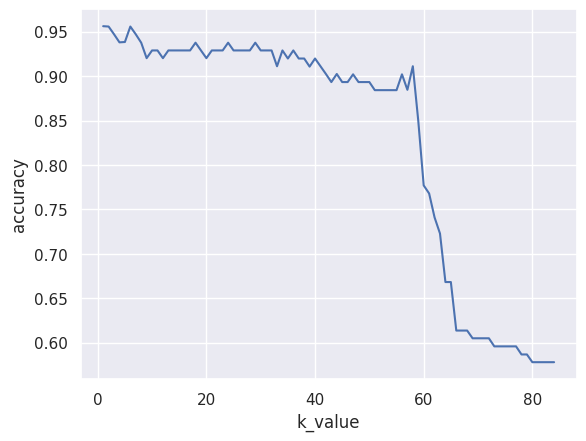

In [ ]:
### Let's see all the accuracies!

import pandas as pd
# Let's create a pandas dataframe out of the above cell's data
crossvalidation_df = pd.DataFrame( {"k_value":np.asarray(range(1,84+1)),
                                    "accuracy":np.asarray(all_accuracies)}
                                    )

import seaborn as sns
sns.set_theme(style="darkgrid")
# Plot the responses for different events and regions
sns.lineplot(x="k_value", y="accuracy",  #  hue="region", style="event",
             data=crossvalidation_df)

### Let's use the "correct value" of k

It will not always be the same, because cross-validation is randomized...

In [ ]:
#
# With the best k, we build and train a new model:
#
# Now using best_k instead of the original, randomly-guessed value:
#
best_k = best_k   # not needed, but nice
from sklearn.neighbors import KNeighborsClassifier
knn_model_tuned = KNeighborsClassifier(n_neighbors=best_k)   # here, we use the best_k!

# we train the model (one line!)
knn_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print(f"Created + trained a knn classifier, now tuned with a (best) k of {best_k}")

# How does it do?!  The next cell will show...

Created + trained a knn classifier, now tuned with a (best) k of 1


### We've made a (better!) model

Let's see how it does...

In [ ]:
#
# Re-create and re-run the  "Model-testing Cell"     How does it do with best_k?!
#
predicted_labels = knn_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual labels:", actual_labels)

# And, the overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.\n\n")

# Plus, we'll print our nicer table...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [2. 0. 1. 1. 2. 2. 1. 0. 0. 1. 2. 0. 2. 1. 0. 0. 1. 1. 2. 1. 1. 0. 0. 0.
 2. 1. 0. 2. 2.]
Actual labels: [2. 0. 1. 1. 2. 2. 2. 0. 0. 1. 2. 0. 2. 1. 0. 0. 1. 1. 2. 1. 1. 0. 0. 0.
 2. 1. 0. 2. 2.]

Results on test set:  28 correct out of 29 total.



row   # :    predicted actual         result
row   0 :    virginica virginica      
row   1 :       setosa setosa         
row   2 :   versicolor versicolor     
row   3 :   versicolor versicolor     
row   4 :    virginica virginica      
row   5 :    virginica virginica      
row   6 :   versicolor virginica      incorrect
row   7 :       setosa setosa         
row   8 :       setosa setosa         
row   9 :   versicolor versicolor     
row  10 :    virginica virginica      
row  11 :       setosa setosa         
row  12 :    virginica virginica      
row  13 :   versicolor versicolor     
row  14 :       setosa setosa         
row  15 :       setosa setosa         
row  16 :   versicolor versicolor     
row  17 :   vers

28

### To make a FINAL predictive model, we use <b>all</b> the data -- with the <u>tuned</u> parameter <tt>k</tt>

That is, we
+ use the best value of <tt>k</tt>, as computed above by cross-validation
+ then, we train on _all_ of the data!

Notice that this next cell uses X_all and y_all:

In [ ]:
#
# Ok!  We tuned our knn modeling to use the "best" value of k...
#
# And, we should now use ALL available data to train our final predictive model:
#
knn_model_final = KNeighborsClassifier(n_neighbors=best_k)     # here, we use the best_k
knn_model_final.fit(X_all, y_all)                              # KEY DIFFERENCE:  we use ALL the data!
print(f"Created + trained a 'final' knn classifier, with a (best) k of {best_k}")

Created + trained a 'final' knn classifier, with a (best) k of 1


### We're ready to deploy our "final + best" predictive model!

In [ ]:
#
# final predictive model (k-nearest-neighbor), with tuned k + ALL data incorporated
#

def predictive_model( Features, Model ):                 # to allow the input of any Model
    """ input: a list of four features
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed for 2d
    predicted_species = Model.predict(our_features)       # The model's prediction!
    predicted_species = int(round(predicted_species[0]))  # unpack the extra brackets
    return predicted_species

#
# Try it!
#

LoF = [
[4.8, 3.1, 1.6, 0.2 ],   # actually setosa
[5.7, 2.9, 4.2, 1.3 ],   # actually versicolor
[5.8, 2.7, 5.1, 1.9 ],   # actually virginica
[5.2, 4.1, 1.5, 0.1 ],   # actually setosa
[5.4, 3.4, 1.5, 0.4 ],   # actually setosa
[5.1, 2.5, 3.0, 1.1 ],   # actually versicolor
[6.2, 2.9, 4.3, 1.3 ],   # actually versicolor
[6.3, 3.3, 6.0, 2.5 ],   # actually virginica
[5.7, 2.8, 4.1, 1.3 ],   # actually virginica  <-- almost always wrong!

[0,0,0,0],               # used as a separator here

[3.7, 2.8, 2.1, 0.3 ],   # let's use this for our own "new" iris ...
]

# run on each one:
for Features in LoF:
    predicted_species = predictive_model( Features, knn_model_final )  # pass in the model, too!
    name = SPECIES[predicted_species]
    print(f"I predict {name} from the features {Features}")    # Answers in the assignment...

I predict setosa from the features [4.8, 3.1, 1.6, 0.2]
I predict versicolor from the features [5.7, 2.9, 4.2, 1.3]
I predict virginica from the features [5.8, 2.7, 5.1, 1.9]
I predict setosa from the features [5.2, 4.1, 1.5, 0.1]
I predict setosa from the features [5.4, 3.4, 1.5, 0.4]
I predict versicolor from the features [5.1, 2.5, 3.0, 1.1]
I predict versicolor from the features [6.2, 2.9, 4.3, 1.3]
I predict virginica from the features [6.3, 3.3, 6.0, 2.5]
I predict versicolor from the features [5.7, 2.8, 4.1, 1.3]
I predict setosa from the features [0, 0, 0, 0]
I predict setosa from the features [3.7, 2.8, 2.1, 0.3]


### Predictive models aren't perfect!
+ Notice that the last prediction above the [0,0,0,0] is (probably) wrong
  + It probably predicted _versicolor_, but it was actually a _virginica_
  + In essence, it was a _virginica_ iris that "looked more like" a _versicolor_ ... ***from these four features!***
  + A botanist would use more than these four features to classify difference species...

+ **Key**: Even when the modeling process runs "perfectly," the models are likely to be imperfect...
+ ... it's just that we won't know where the imperfections are -- until future observations arrive!

In [ ]:
#
# That's it!  Welcome to the world of model-building workflows!!
#
#             Our prediction?  We'll be back for more ML!
#
# In fact, the rest of the hw is to run more ML workflows:
# Births, Digits, another dataset, which could be Titanic, Housing, ...
#
# and more ML algorithms:
# Decision Trees, Random Forests, Neural Nets
# and, optionally, time series, recommendation systems, ...

### That's it! Our model is complete...

... not perfect, but **complete**

What does this mean?

It means that the model -- the function (above) -- is ***already*** prepared to provide an output for every possible input!

We can see this in a plot of the outputs for every input in the "sepal" plane (length vs. width) as well as the "petal" plane:

In [ ]:
# we can only plot 2 dimensions at a time!
# These two will be our constants:
sepallen = 5.0
sepalwid = 3.0
# petallen =
# petalwid =

VERTICAL = np.arange(0,8,.1) # array of vertical input values
HORIZONT = np.arange(0,8,.1) # array of horizontal input values
PLANE = np.zeros( (len(HORIZONT),len(VERTICAL)) ) # the output array
MODEL = knn_model_final


col = 0
row = 0
for petallen in VERTICAL: # for every sepal length
  for petalwid in HORIZONT: # for every sepal width
    Features = [ sepallen, sepalwid, petallen, petalwid ]
    output = predictive_model(Features,MODEL)
    #print(f"Input {Features} Output: {output}")
    PLANE[row,col] = output
    row += 1
  row = 0
  col += 1
  print(".", end="")  # so we know it's running
  if col % 42 == 0: print() # same...

print("\n", PLANE[0:3,0:3]) # small bit of the lower-left corner

..........................................
......................................
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


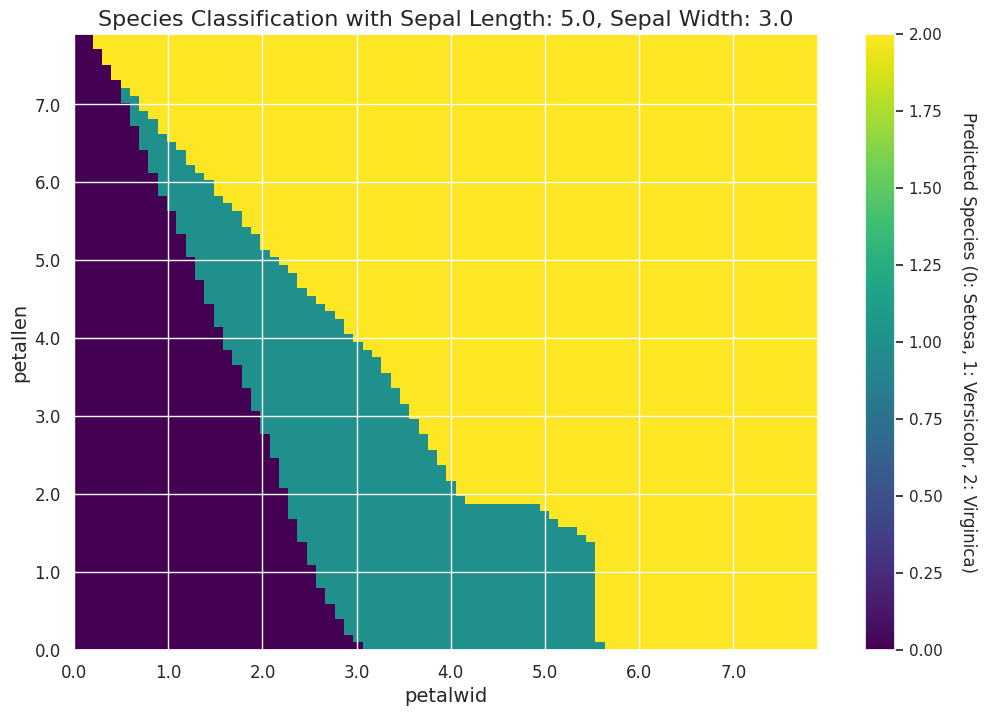

Remember our species-to-number mapping:
0 - setosa
1 - versicolor
2 - virginica


In [ ]:
# Assuming 'PLANE', 'VERTICAL', and 'HORIZONT' are defined as in the original code

# Create a new figure and axes
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))

# Create the heatmap
im = ax.imshow(PLANE, cmap="viridis", extent=[HORIZONT.min(), HORIZONT.max(), VERTICAL.min(), VERTICAL.max()], origin="lower", aspect="auto")

# Set axis labels and ticks
ax.set_xlabel("petalwid", fontsize=14)
ax.set_ylabel("petallen", fontsize=14)

# Calculate the indices for reduced ticks and labels
reduced_tick_indices = np.arange(0, len(HORIZONT), len(HORIZONT)//8)
# Ensure that the last index is included
# if reduced_tick_indices[-1] != len(HORIZONT)-1:
#   reduced_tick_indices = np.append(reduced_tick_indices, len(HORIZONT)-1)


# Set ticks and tick labels with correct values
ax.set_xticks(HORIZONT[reduced_tick_indices]) # Display ticks every 0.4 unit
ax.set_yticks(VERTICAL[reduced_tick_indices])
ax.set_xticklabels([f"{x:.1f}" for x in HORIZONT[reduced_tick_indices]], fontsize=12)  # Format x-axis labels
ax.set_yticklabels([f"{y:.1f}" for y in VERTICAL[reduced_tick_indices]], fontsize=12)  # Format y-axis labels


# Add a colorbar
cbar = plt.colorbar(im)
cbar.set_label('Predicted Species (0: Setosa, 1: Versicolor, 2: Virginica)', rotation=270, labelpad=25)

# Set the title
sepallen = 5.0
sepalwid = 3.0
ax.set_title(f"Species Classification with Sepal Length: {sepallen}, Sepal Width: {sepalwid}", fontsize=16)

plt.show()

print("Remember our species-to-number mapping:")
print("0 - setosa")
print("1 - versicolor")
print("2 - virginica")

**# Homework 7: Births**

<br>

**Mohammed IST341_Participant_4 & IST341_Participant_2**

<br>

In [ ]:
import numpy as np
import pandas as pd

filename='births.csv'
df=pd.read_csv(filename)
print(f"{filename} : file read into a pandas dataframe.")

births.csv : file read into a pandas dataframe.


In [ ]:
df

,month,day,births,above/below median,from http://chmullig.com/2012/06/births-by-day-of-year/
0,1,1,160369,below,NaN
1,1,2,169896,below,NaN
2,1,3,180036,below,NaN
3,1,4,182854,below,NaN
4,1,5,184145,below,NaN
...,...,...,...,...,...
367,12,27,194006,above,NaN
368,12,28,201768,above,NaN
369,12,29,204806,above,NaN
370,12,30,206894,above,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 5 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   month                                                    372 non-null    int64  
 1   day                                                      372 non-null    int64  
 2   births                                                   372 non-null    int64  
 3   above/below median                                       372 non-null    object 
 4   from http://chmullig.com/2012/06/births-by-day-of-year/  0 non-null      float64
dtypes: float64(1), int64(3), object(1)
memory usage: 14.7+ KB


In [ ]:
for column_name in df.columns:
    print(f"{column_name =}")

column_name ='month'
column_name ='day'
column_name ='births'
column_name ='above/below median'
column_name ='from http://chmullig.com/2012/06/births-by-day-of-year/'


In [ ]:
ROW = 0
COLUMN = 1

df_clean1 = df.drop(['births','from http://chmullig.com/2012/06/births-by-day-of-year/'], axis=COLUMN)
df_clean1

,month,day,above/below median
0,1,1,below
1,1,2,below
2,1,3,below
3,1,4,below
4,1,5,below
...,...,...,...
367,12,27,above
368,12,28,above
369,12,29,above
370,12,30,above


In [ ]:
df_clean2 = df_clean1.dropna()
df_clean2.info()

df_clean2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   month               372 non-null    int64 
 1   day                 372 non-null    int64 
 2   above/below median  372 non-null    object
dtypes: int64(2), object(1)
memory usage: 8.8+ KB


,month,day,above/below median
0,1,1,below
1,1,2,below
2,1,3,below
3,1,4,below
4,1,5,below
...,...,...,...
367,12,27,above
368,12,28,above
369,12,29,above
370,12,30,above


In [ ]:
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   month               372 non-null    int64 
 1   day                 372 non-null    int64 
 2   above/below median  372 non-null    object
dtypes: int64(2), object(1)
memory usage: 8.8+ KB


In [ ]:
COLUMNS = df_clean1.columns
print(f"COLUMNS is {COLUMNS}")

print(f"COLUMNS[0] is {COLUMNS[0]}\n")

COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i
print(f"COL_INDEX is {COL_INDEX}")

COLUMNS is Index(['month', 'day', 'above/below median'], dtype='object')
COLUMNS[0] is month

COL_INDEX is {'month': 0, 'day': 1, 'above/below median': 2}


In [ ]:
MEDIAN = ['below','above']
MEDIAN_INDEX = {'above':1,'below':0}

def convert_median(median):

    return MEDIAN_INDEX[median]

for median in MEDIAN:
    print(f"{median} maps to {convert_median(median)}")

below maps to 0
above maps to 1


In [ ]:
convert_median( 'below')

0

In [ ]:
df_clean3 = df_clean2.copy()

df_clean3['above/below median (num)'] = df_clean2['above/below median'].apply(convert_median)

df_clean3

,month,day,above/below median,above/below median (num)
0,1,1,below,0
1,1,2,below,0
2,1,3,below,0
3,1,4,below,0
4,1,5,below,0
...,...,...,...,...
367,12,27,above,1
368,12,28,above,1
369,12,29,above,1
370,12,30,above,1


In [ ]:
df_tidy =  df_clean3
old_basename = filename[:-4]
cleaned_filename = old_basename + "_cleaned.csv"
print(f"cleaned_filename is {cleaned_filename}")

df_tidy.to_csv(cleaned_filename, index_label=False)

cleaned_filename is births_cleaned.csv


In [ ]:
df_tidy_reread = pd.read_csv(cleaned_filename)
print(f"{filename} : file read into a pandas dataframe.")
df_tidy_reread

births.csv : file read into a pandas dataframe.


,month,day,above/below median,above/below median (num)
0,1,1,below,0
1,1,2,below,0
2,1,3,below,0
3,1,4,below,0
4,1,5,below,0
...,...,...,...,...
367,12,27,above,1
368,12,28,above,1
369,12,29,above,1
370,12,30,above,1


In [ ]:
COLUMNS = df_tidy.columns
print(f"COLUMNS is {COLUMNS}\n")

print(f"COLUMNS[0] is {COLUMNS[0]}\n")

COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i
print(f"COL_INDEX is {COL_INDEX}\n\n")

MEDIAN = ['below','above']
MEDIAN_INDEX = {'below':0,'above':1}

def convert_median(median):
    """ return the species index (a unique integer/category) """

    return MEDIAN_INDEX[median]

for median in MEDIAN:
    print(f"{median} maps to {convert_median(median)}")


COLUMNS is Index(['month', 'day', 'above/below median', 'above/below median (num)'], dtype='object')

COLUMNS[0] is month

COL_INDEX is {'month': 0, 'day': 1, 'above/below median': 2, 'above/below median (num)': 3}


below maps to 0
above maps to 1


In [ ]:
import numpy as np
import pandas as pd

cleaned_filename = "births_cleaned.csv"
df_tidy = pd.read_csv(cleaned_filename)
print(f"{cleaned_filename} : file read into a pandas dataframe.")
df_tidy

births_cleaned.csv : file read into a pandas dataframe.


,month,day,above/below median,above/below median (num)
0,1,1,below,0
1,1,2,below,0
2,1,3,below,0
3,1,4,below,0
4,1,5,below,0
...,...,...,...,...
367,12,27,above,1
368,12,28,above,1
369,12,29,above,1
370,12,30,above,1


In [ ]:
pd.set_option('display.max_rows',20)
pd.set_option('max_colwidth', 400)
df_tidy

,month,day,above/below median,above/below median (num)
0,1,1,below,0
1,1,2,below,0
2,1,3,below,0
3,1,4,below,0
4,1,5,below,0
...,...,...,...,...
367,12,27,above,1
368,12,28,above,1
369,12,29,above,1
370,12,30,above,1


In [ ]:
df_tidy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 372 entries, 0 to 371
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   month                     372 non-null    int64 
 1   day                       372 non-null    int64 
 2   above/below median        372 non-null    object
 3   above/below median (num)  372 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 14.5+ KB


In [ ]:
ROW = 0
COLUMN = 1
df_model1 = df_tidy.drop( 'above/below median', axis=COLUMN )
df_model1

,month,day,above/below median (num)
0,1,1,0
1,1,2,0
2,1,3,0
3,1,4,0
4,1,5,0
...,...,...,...
367,12,27,1
368,12,28,1
369,12,29,1
370,12,30,1


In [ ]:
COLUMNS = df_model1.columns
print(f"COLUMNS is {COLUMNS}\n")
print(f"COLUMNS[0] is {COLUMNS[0]}\n")

COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i
print(f"COL_INDEX is {COL_INDEX}\n\n")

MEDIAN = ['below','above']
MEDIAN_INDEX = {'below':0,'above':1}

def convert_median(median):

    return MEDIAN_INDEX[median]

for median in MEDIAN:
    print(f"{median} maps to {convert_median(median)}")

COLUMNS is Index(['month', 'day', 'above/below median (num)'], dtype='object')

COLUMNS[0] is month

COL_INDEX is {'month': 0, 'day': 1, 'above/below median (num)': 2}


below maps to 0
above maps to 1


In [ ]:
A = df_model1.to_numpy()
print(A)

[[ 1  1  0]
 [ 1  2  0]
 [ 1  3  0]
 ...
 [12 29  1]
 [12 30  1]
 [12 31  1]]


In [ ]:
A = A.astype('int64')
print(A[0:5])

[[1 1 0]
 [1 2 0]
 [1 3 0]
 [1 4 0]
 [1 5 0]]


In [ ]:
NUM_ROWS, NUM_COLS = A.shape
print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")


The dataset has 372 rows and 3 cols


In [ ]:
df_tidy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 372 entries, 0 to 371
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   month                     372 non-null    int64 
 1   day                       372 non-null    int64 
 2   above/below median        372 non-null    object
 3   above/below median (num)  372 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 14.5+ KB


In [ ]:
n = 35
print(f"births #{n} is {A[n]}")

for i in range(len(COLUMNS)):
    colname = COLUMNS[i]
    value = A[n][i]
    print(f"  The {colname} is {value}")

median_index = COL_INDEX['above/below median (num)']
median_num = int(round(A[n][median_index]))
median = MEDIAN[median_num]
print(f"  The median is {median} (i.e., {median_num})")

births #35 is [2 5 0]
  The month is 2
  The day is 5
  The above/below median (num) is 0
  The median is below (i.e., 0)


In [ ]:
print("+++ Start of data definitions +++\n")

X_all = A[:,0:2]
y_all = A[:,2]

print(f"y_all (just the labels)   are \n {y_all}")
print(f"X_all (just the features - a few) are \n {X_all[0:5]}")

+++ Start of data definitions +++

y_all (just the labels)   are 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1
 1 1]
X_all (just the features - a few) are 
 [[1 1]
 [1 2]
 [1 3]
 [1 4]
 [1 5]]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2)

print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )

print("+++++")
print(f"Held-out data... (testing data: {len(y_test)} rows)")
print("+++++\n")
print(f"y_test: {y_test}")
print(f"X_test (first few rows): {X_test[0:5,:]}")
print()


training with 297 rows;  testing with 75 rows

+++++
Held-out data... (testing data: 75 rows)
+++++

y_test: [1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 1
 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1
 0]
X_test (first few rows): [[ 6 20]
 [12 27]
 [ 3 29]
 [ 4  9]
 [ 7 23]]



In [ ]:
print("+++++")
print(f"Data used for modeling... (training data: {len(y_train)} rows)")
print("+++++\n")
print(f"y_train: {y_train}")
print(f"X_train (first few rows): {X_train[0:5,:]}")

+++++
Data used for modeling... (training data: 297 rows)
+++++

y_train: [0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1
 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0
 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1
 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0
 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0
 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1
 1]
X_train (first few rows): [[ 4  3]
 [ 2 17]
 [ 7 21]
 [ 9 12]
 [ 9  2]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 84
knn_model = KNeighborsClassifier(n_neighbors=k)

knn_model.fit(X_train, y_train)
print("Created and trained a knn classifier with k =", k)

Created and trained a knn classifier with k = 84


In [ ]:
predicted_labels = knn_model.predict(X_test)
actual_labels = y_test
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

Predicted labels: [1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1
 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0
 0]
Actual  labels  : [1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 1
 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1
 0]

Results on test set:  53 correct out of 75 total.


In [ ]:
def compare_labels(predicted_labels, actual_labels):
    """ a more neatly formatted comparison """
    NUM_LABELS = len(predicted_labels)
    num_correct = 0

    print()
    print(f'row {"#":>3s} : {"predicted":>12s} {"actual":<12s}   {"result"}')

    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:
            result = ""
            num_correct += 1

        print(f"row {i:>3d} : {MEDIAN[p]:>12s} {MEDIAN[a]:<12s}   {result}")

    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
    return num_correct
compare_labels(predicted_labels,actual_labels)


row   # :    predicted actual         result
row   0 :        above above          
row   1 :        above above          
row   2 :        below below          
row   3 :        below below          
row   4 :        above above          
row   5 :        above above          
row   6 :        below below          
row   7 :        above below          incorrect
row   8 :        above above          
row   9 :        above above          
row  10 :        above above          
row  11 :        above above          
row  12 :        above below          incorrect
row  13 :        below above          incorrect
row  14 :        above above          
row  15 :        below below          
row  16 :        above above          
row  17 :        below below          
row  18 :        above below          incorrect
row  19 :        above above          
row  20 :        above above          
row  21 :        above above          
row  22 :        below above          incorrect
row  23 :   

53

In [ ]:
def predictive_model( Features ):

    our_features = np.asarray([Features[:2]])
    predicted_median = knn_model.predict(our_features)

    predicted_median = int(round(predicted_median[0]))
    name = MEDIAN[predicted_median]
    return name

Features = [-7006.7,3900.3,0.7,80]
result = predictive_model( Features )
print(f"I predict {result} from Features {Features}")

I predict below from Features [-7006.7, 3900.3, 0.7, 80]


In [ ]:
from sklearn.model_selection import cross_val_score
best_k = 84
best_accuracy = 0

for k in range(1,85):
    knn_cv_model = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score( knn_cv_model, X_train, y_train, cv=5 )
    this_cv_accuracy = cv_scores.mean()
    print(f"k: {k:2d}  cv accuracy: {this_cv_accuracy:7.4f}")

    if this_cv_accuracy > best_accuracy:
        best_accuracy = this_cv_accuracy
        best_k = k

print(f"best_k = {best_k}   yields the highest average cv accuracy.")  # print the best one


k:  1  cv accuracy:  0.7946
k:  2  cv accuracy:  0.7811
k:  3  cv accuracy:  0.8216
k:  4  cv accuracy:  0.8183
k:  5  cv accuracy:  0.8416
k:  6  cv accuracy:  0.8486
k:  7  cv accuracy:  0.8554
k:  8  cv accuracy:  0.8486
k:  9  cv accuracy:  0.8486
k: 10  cv accuracy:  0.8519
k: 11  cv accuracy:  0.8385
k: 12  cv accuracy:  0.8386
k: 13  cv accuracy:  0.8420
k: 14  cv accuracy:  0.8420
k: 15  cv accuracy:  0.8319
k: 16  cv accuracy:  0.8285
k: 17  cv accuracy:  0.8219
k: 18  cv accuracy:  0.8218
k: 19  cv accuracy:  0.8253
k: 20  cv accuracy:  0.8286
k: 21  cv accuracy:  0.8151
k: 22  cv accuracy:  0.8251
k: 23  cv accuracy:  0.8219
k: 24  cv accuracy:  0.8219
k: 25  cv accuracy:  0.8252
k: 26  cv accuracy:  0.8185
k: 27  cv accuracy:  0.8118
k: 28  cv accuracy:  0.8084
k: 29  cv accuracy:  0.8118
k: 30  cv accuracy:  0.8050
k: 31  cv accuracy:  0.8050
k: 32  cv accuracy:  0.8084
k: 33  cv accuracy:  0.8151
k: 34  cv accuracy:  0.8082
k: 35  cv accuracy:  0.8082
k: 36  cv accuracy: 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model_tuned = KNeighborsClassifier(n_neighbors=best_k)

knn_model_tuned.fit(X_train, y_train)
print(f"Created + trained a knn classifier, now tuned with a (best) k of {best_k}")


Created + trained a knn classifier, now tuned with a (best) k of 7


In [ ]:
predicted_labels = knn_model_tuned.predict(X_test)
actual_labels = y_test

print("Predicted labels:", predicted_labels)
print("Actual labels:", actual_labels)

num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.\n\n")

compare_labels(predicted_labels,actual_labels)

Predicted labels: [0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1
 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1
 0]
Actual labels: [1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 1
 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1
 0]

Results on test set:  60 correct out of 75 total.



row   # :    predicted actual         result
row   0 :        below above          incorrect
row   1 :        above above          
row   2 :        below below          
row   3 :        below below          
row   4 :        above above          
row   5 :        above above          
row   6 :        below below          
row   7 :        below below          
row   8 :        above above          
row   9 :        above above          
row  10 :        above above          
row  11 :        above above          
row  12 :        below below          
row  13 :        above above          
row  

60

In [ ]:
knn_model_final = KNeighborsClassifier(n_neighbors=best_k)
knn_model_final.fit(X_all, y_all)
print(f"Created + trained a 'final' knn classifier, with a (best) k of {best_k}")

Created + trained a 'final' knn classifier, with a (best) k of 7


In [ ]:
def predictive_model( Features, Model ):
    our_features = np.asarray([Features[:2]])
    predicted_median = Model.predict(our_features)
    predicted_median = int(round(predicted_median[0]))
    return predicted_median

LoF = [
[1, 1 ],
[2, 27 ],
[3, 7 ],
[4, 10],
[5, 5 ],
[6, 5 ],
[10, 18 ],
[11, 6 ],
[12, 31 ],
]

for Features in LoF:
    predicted_median = predictive_model( Features, knn_model_final )
    name = MEDIAN[predicted_median]
    print(f"I predict {name} median from the features {Features}")

I predict below median from the features [1, 1]
I predict below median from the features [2, 27]
I predict below median from the features [3, 7]
I predict below median from the features [4, 10]
I predict below median from the features [5, 5]
I predict below median from the features [6, 5]
I predict above median from the features [10, 18]
I predict above median from the features [11, 6]
I predict below median from the features [12, 31]


In [ ]:
day = 11
month = 1

VERTICAL = np.arange(0,10,.1)
HORIZONT = np.arange(0,10,.1)
PLANE = np.zeros( (len(HORIZONT),len(VERTICAL)) )

row = 0
col = 0
for day in VERTICAL:
  for month in HORIZONT:
    Features = [ day,month]
    output = predictive_model(Features,knn_model_final)
    PLANE[row,col] = output
    col += 1
  col = 0
  row += 1
  print(".", end="")
  if row % 42 == 0: print()

print("\n", PLANE[0:3,0:3])

..........................................
..........................................
................
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


<Axes: xlabel='k_value', ylabel='accuracy'>

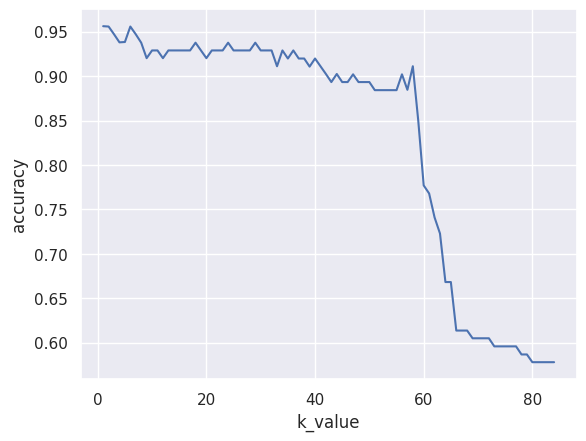

In [ ]:
### Let's see all the accuracies!

import pandas as pd
# Let's create a pandas dataframe out of the above cell's data
crossvalidation_df = pd.DataFrame( {"k_value":np.asarray(range(1,84+1)),
                                    "accuracy":np.asarray(all_accuracies)}
                                    )

import seaborn as sns
sns.set_theme(style="darkgrid")
# Plot the responses for different events and regions
sns.lineplot(x="k_value", y="accuracy",  #  hue="region", style="event",
             data=crossvalidation_df)

Remember our below/above median-to-number mapping:
0 - below
1- above


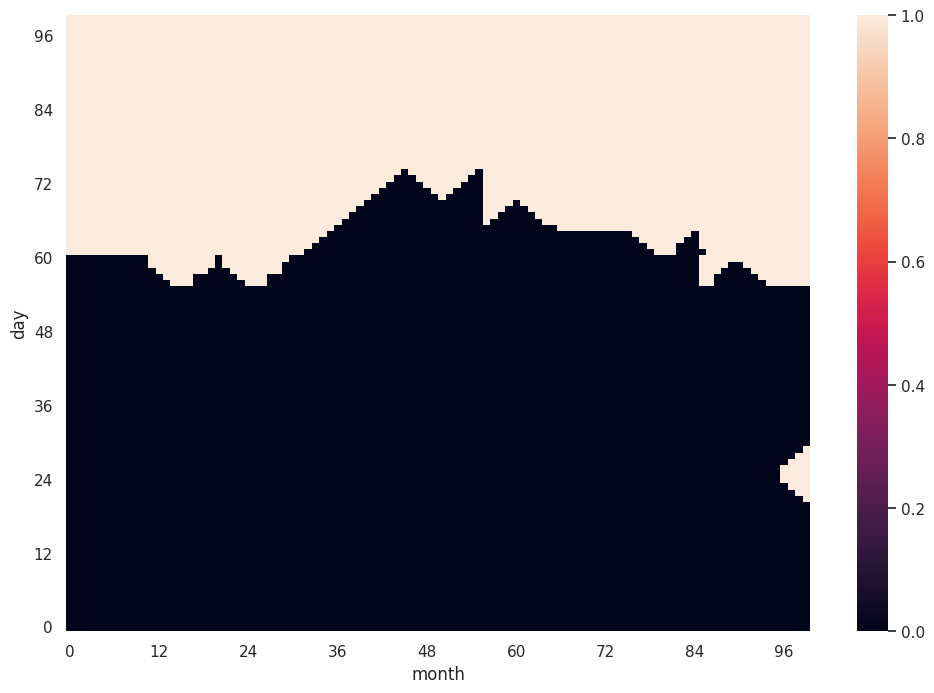

In [ ]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(12,8)})
ax = sns.heatmap(PLANE)
ax.invert_yaxis()
ax.set(xlabel="month", ylabel="day")
ax.set_xticks(ax.get_xticks()[::4])
ax.set_yticks(ax.get_yticks()[::4])

print("Remember our below/above median-to-number mapping:")
print("0 - below")
print("1- above")

In [ ]:
month = 5

VERTICAL = np.arange(0,10,.1)
HORIZONT = np.arange(0,10,.1)
PLANEv2 = np.zeros( (len(HORIZONT),len(VERTICAL)) )

row = 0
col = 0
for day in VERTICAL:
  for month in HORIZONT:
    Features = [ day,month ]
    output = predictive_model(Features,knn_model_final)
    PLANEv2[row,col] = output
    col += 1
  col = 0
  row += 1
  print(".", end="")
  if row % 42 == 0: print()

print("\n", PLANEv2[0:3,0:3])

..........................................
..........................................
................
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Remember our below/above median-to-number mapping:
0 - below
1- above


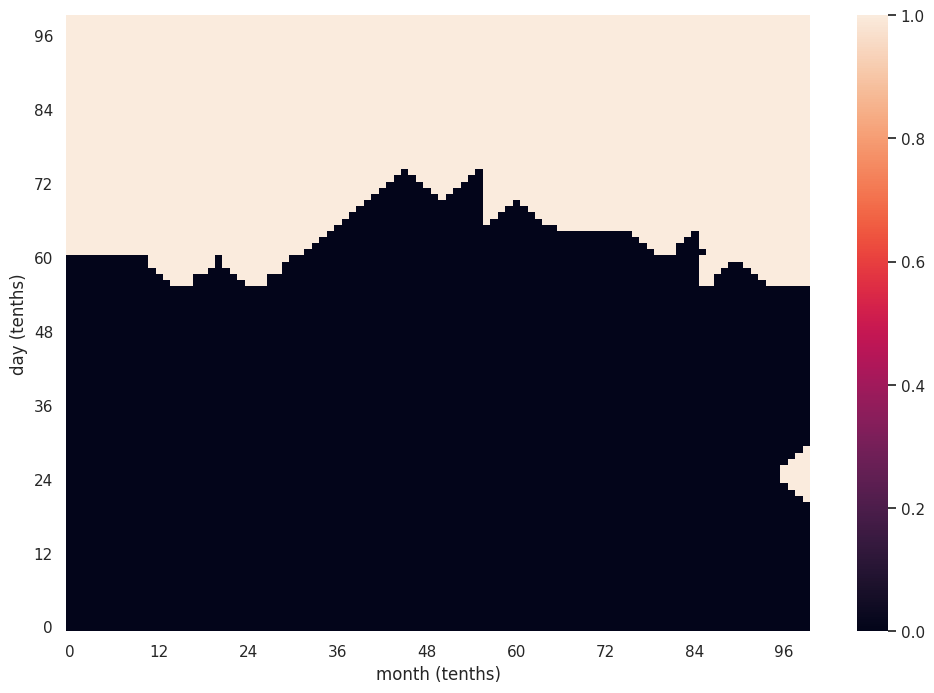

In [ ]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(12,8)})
ax = sns.heatmap(PLANEv2)
ax.invert_yaxis()
ax.set(xlabel="month (tenths)", ylabel="day (tenths)")
ax.set_xticks(ax.get_xticks()[::4])
ax.set_yticks(ax.get_yticks()[::4])

print("Remember our below/above median-to-number mapping:")
print("0 - below")
print("1- above")

# Reading for hw7...   


This week's reading is a 2020 Economist article (pdf) on the pitfalls and promise of the data-driven era of AI we now inhabit. The article takes a "data-based" view on recent developments and concerns in AI, especially machine-learning (or "statistical learning"). original

One of the newest ideas in this article is the possibility -- and possible importance -- of generating data to improve model-training, when available data is inequitable, inflexible, or insufficient in another way.

Using the article and your own experience, what are your thoughts on artificially generating data to assist AI/ML training? Possible jumping-off points include

(1) echo-chamber effects: can generated data yield more fairness -- or only reinforce existing biases?, or
(2) implementation concerns: what process would artificially generate the data?, or
(3) a specific example you've encountered, where a computational system generated data, but "got things obviously wrong" (there may be lots of these examples!)
In this last case, the generated data made the world's "data-landscape" worse, not better. Alternative directions on artificially-generated data more than welcome!

As with each week's reading, responses should be thoughtful, but need not be long: a 4-5 sentence paragraph is wonderful.

Reading response

<br>

Creating artificial (or synthetic) data to train AI models can be very helpful, especially when real-world data is limited, biased, or hard to get. As the Economist article explains, companies like Amazon used synthetic data to improve their systems when real data wasn’t enough. However, there are risks. If the synthetic data is based on biased real-world examples, it may repeat or even increase those biases. I’ve seen this in health AI systems, where models trained on data from mostly one group don’t work well for others. A similar issue can happen in education, for example, an AI tutor trained mostly on data from English-speaking students might not respond well to students who speak other languages or have different learning styles. So, while artificial data can support fairness and protect privacy, it must be created carefully to reflect real-world diversity and avoid reinforcing existing problems.


<br>


<br>
<hr>
<br>